In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


In [ ]:
df = pd.read_excel('/content/10k- 200KN- Al Alloy (1).xlsx')


In [ ]:

X = df[['Time(Sec)', 'Force(N)']]
y = df[['Total Deformation(mm)']]


In [ ]:
param_grid = {
    'booster': ['gbtree'],
    'n_estimators': [1000],
    'max_depth': [11],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'reg_alpha': [0.1],
    'reg_lambda': [0.1],
    'learning_rate': [0.1]
}


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
xgb_model = XGBRegressor()


In [ ]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           cv=5, scoring='r2', n_jobs=-1, verbose=1)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'booster': ['gbtree'], 'colsample_bytree': [0.8],
                         'learning_rate': [0.1], 'max_depth': [11],
                         'n_estimators': [1000], 'reg_alpha': [0.1],
                         'reg_lambda': [0.1], 'subsample': [0.8]},
             scoring='r2', verbose=1)

In [ ]:
best_model = grid_search.best_estimator_


In [ ]:
y_pred_best = best_model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Predictions and true values (assuming y_test and y_pred_best are already defined)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)  # Root Mean Squared Error
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best, multioutput='uniform_average')

# Display the results
print(f"R² Score (Best Model): {r2_best}")
print(f"RMSE (Best Model): {rmse_best}")
print(f"Mean Absolute Error (Best Model): {mae_best}")


R² Score (Best Model): 0.9890693426132202
RMSE (Best Model): 0.1734650641142253
Mean Absolute Error (Best Model): 0.12534511520604646


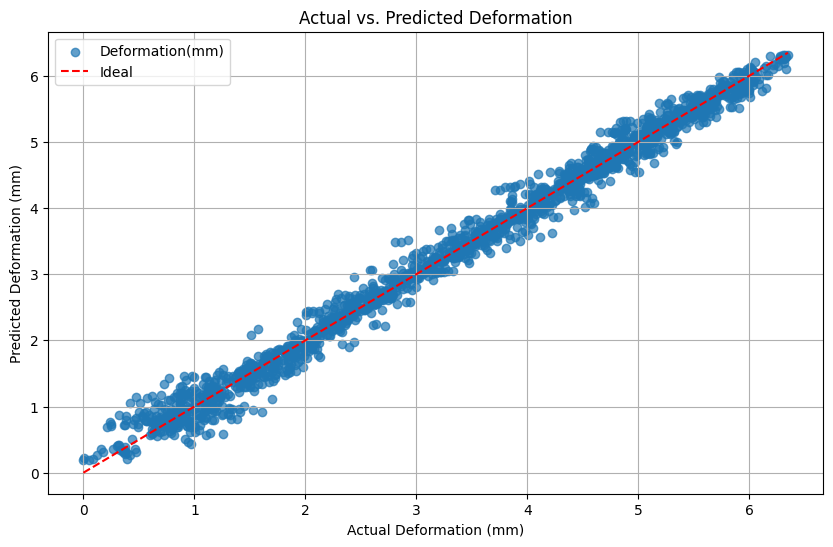

In [ ]:
import matplotlib.pyplot as plt

# If y_pred_best is 1D, just plot directly for Deformation
plt.figure(figsize=(10, 6))
plt.scatter(y_test['Total Deformation(mm)'], y_pred_best, label='Deformation(mm)', alpha=0.7)
plt.plot([y_test['Total Deformation(mm)'].min(), y_test['Total Deformation(mm)'].max()],
         [y_test['Total Deformation(mm)'].min(), y_test['Total Deformation(mm)'].max()],
         'r--', label='Ideal')

plt.xlabel('Actual Deformation (mm)')
plt.ylabel('Predicted Deformation (mm)')
plt.title('Actual vs. Predicted Deformation')
plt.legend()
plt.grid(True)
plt.show()


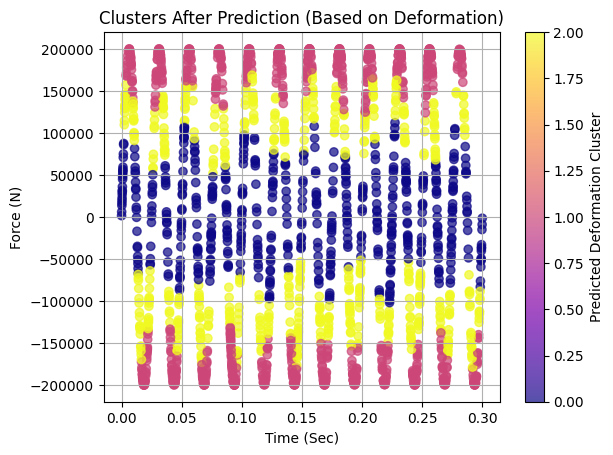

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe
X = df[['Time(Sec)', 'Force(N)']]  # Features
y = df[['Total Deformation(mm)']]  # Target

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train the XGBoost model
model = xgb.XGBRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Step 4: Predict the deformation using the test data
y_pred = model.predict(X_test_scaled)

# Step 5: Apply K-Means Clustering on the predicted deformation
kmeans = KMeans(n_clusters=3, random_state=42)
predicted_clusters = kmeans.fit_predict(y_pred.reshape(-1, 1))

# Step 6: Plot the clusters based on the predicted deformation
plt.scatter(X_test['Time(Sec)'], X_test['Force(N)'], c=predicted_clusters, cmap='plasma', alpha=0.7)
plt.xlabel('Time (Sec)')
plt.ylabel('Force (N)')
plt.title('Clusters After Prediction (Based on Deformation)')
plt.colorbar(label='Predicted Deformation Cluster')
plt.grid(True)
plt.show()


In [ ]:
import pickle

# Assume `model` is your trained model
model_filename = 'trained_model.pkl'

# Save the model as a pickle file
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved as {model_filename}")


Model saved as trained_model.pkl
